# External modules

In [28]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [29]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [30]:
#data <- xfun::in_dir(dir = path, expr = read.csv(file = "./04_experimentation_03/final_dataset.csv", sep = ","))
data <- xfun::in_dir(dir = path, expr = read.csv("./04_experimentation_03/localization_errors.csv", sep =";"))

In [31]:
str(data)

'data.frame':	35083 obs. of  4 variables:
 $ timestamp         : num  1.77e+09 1.77e+09 1.77e+09 1.77e+09 1.77e+09 ...
 $ lateral_error     : num  2.65 2.61 2.61 2.58 2.6 ...
 $ longitudinal_error: num  -0.0246 -0.0285 -0.0317 -0.0294 -0.0266 ...
 $ haversine_error   : num  2.65 2.6 2.61 2.58 2.59 ...


# Impute outliers

In [34]:
x_raw <- abs(data$lateral_error)

In [55]:
coefficient_iqr <- 1.5
method <- c("interpolate", "mode", "median", "mean")[1]

In [56]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

In [57]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [58]:
outlier_positions <- x_raw_object$outlier_positions

In [59]:
print(outlier_positions)

   [1]     1     2     3     4     5     6     7     8     9    10    11    12
  [13]    13    14    15    16    17    18    19    20    21    22    23    24
  [25]    25    26    27    28    29    30    31    32    33    34    35    36
  [37]    37    38    39    40    41    42    43    44    45    46    47    48
  [49]    49    50    51    52    53    54    55    56    57    58    59    60
  [61]    61    62    63    64    65    66    67    68    69    70    71    72
  [73]    73    74    75    76    77    78    79    80    81    82    83    84
  [85]    85    86    87    88    91    92  3611  3612  3617  3619  3620  3622
  [97]  3623  3624  3625  3626  3628  3701  3702  3703  3704  3705  3706  3707
 [109]  3708  3709  3710  3711  3712  3713  3714  3715  3716  3717  3718  3719
 [121]  3945  3946  3947  3950  3952  3953  4038  4147  4151  4152  4153  4154
 [133]  4155  4156  4157  4158  4159  4160  4161  4162  4163  4164  4165  4166
 [145]  4167  4168  4169  4170  4171  4172  4173  41

In [60]:
range(outlier_positions)

[1]     1 35038

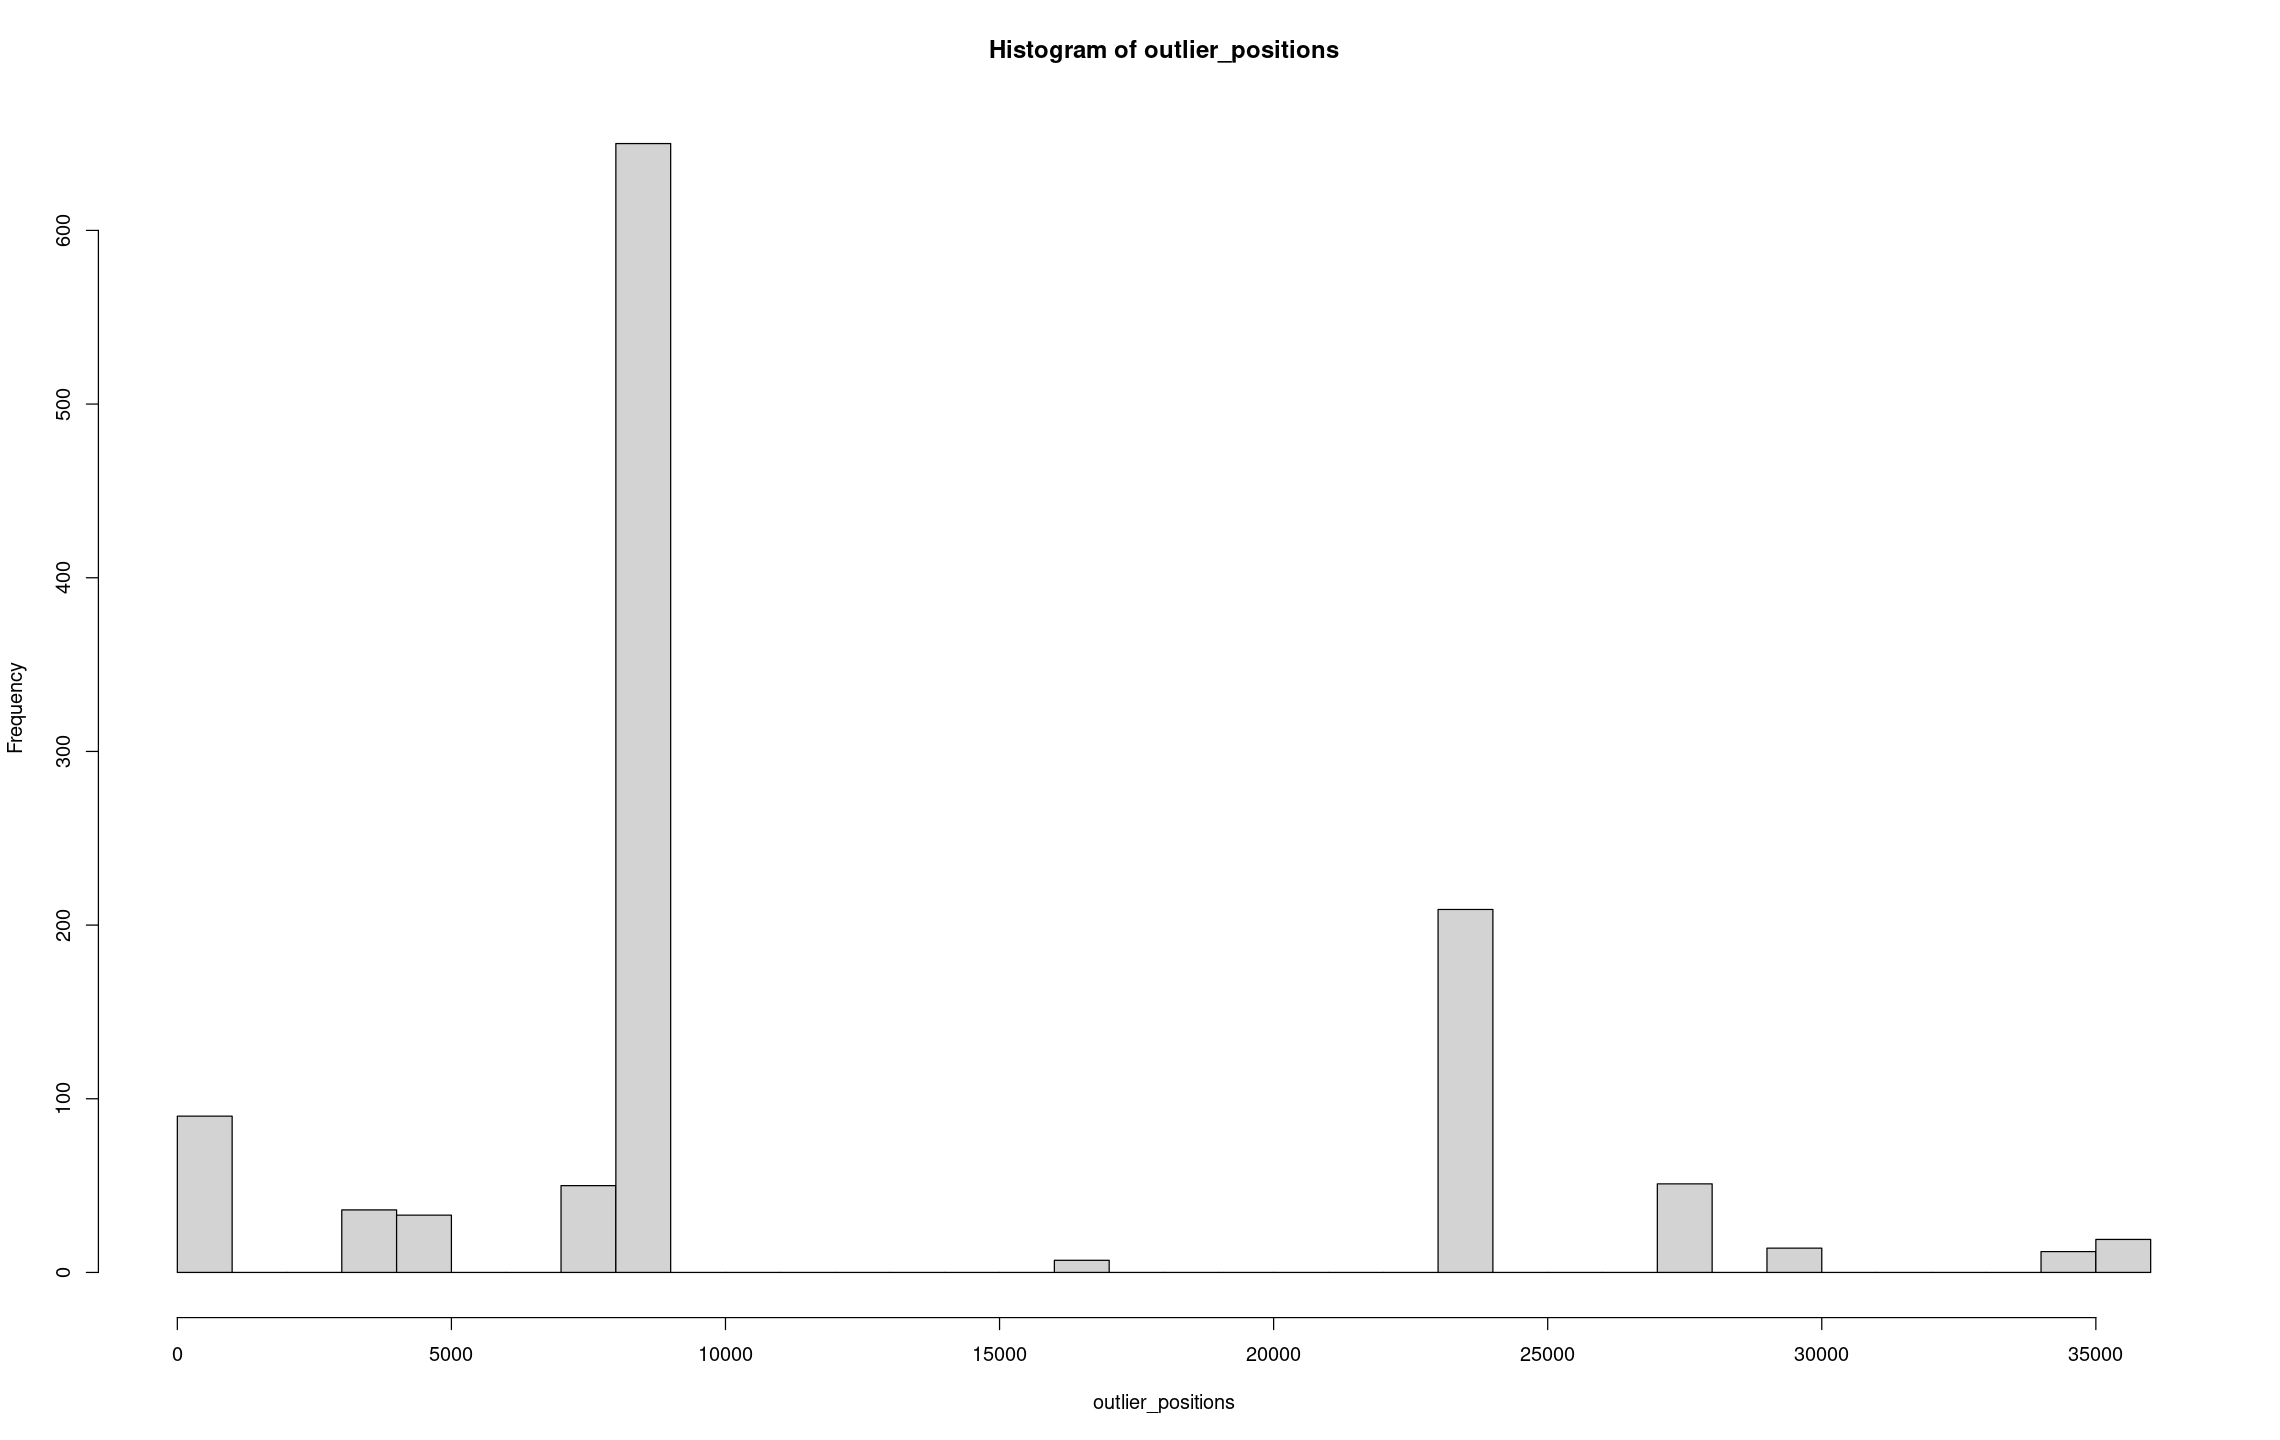

In [61]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

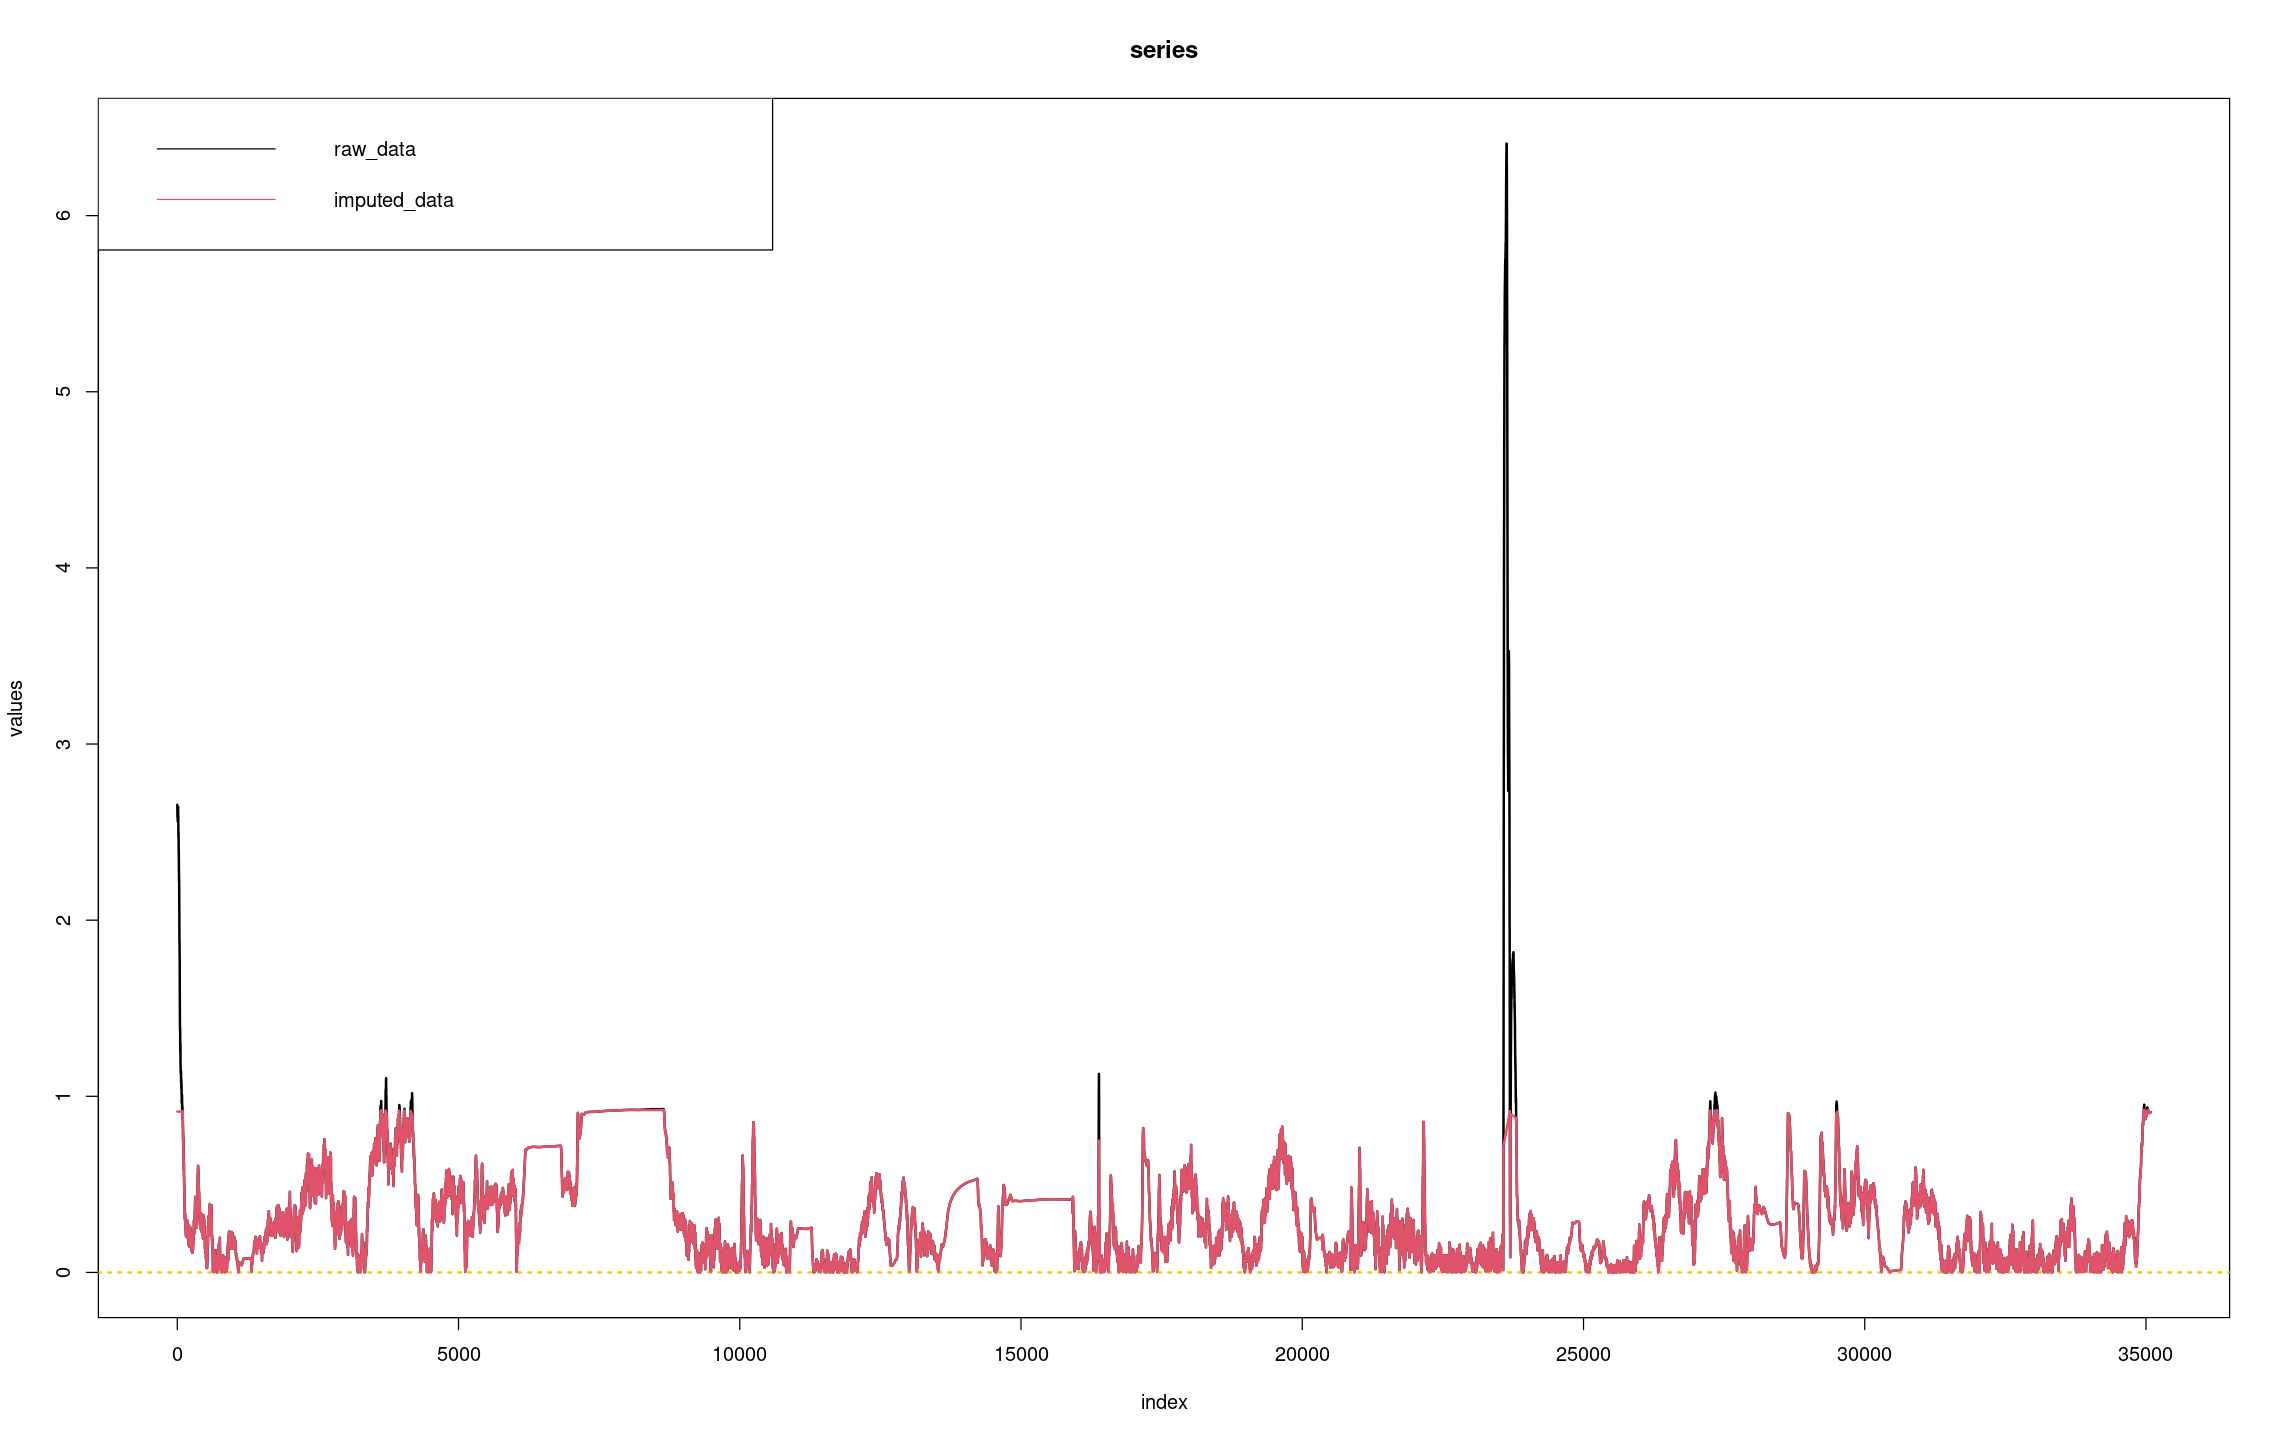

In [62]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [64]:
# data with imputed outliers
x_with_imputed_outliers <- x_raw_object$imputed_data 
data_clean <- data

In [65]:
# data with removed outliers
#x_with_removed_outliers <- x_raw[-outlier_positions]
#data_clean <- data[-outlier_positions, ]

# Data description

In [66]:
x <- x_with_imputed_outliers
#x <- x_with_removed_outliers
n <- length(x)

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           35'083           35'083                0           34'437
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0146465367638  0.0313941791653  0.0880981609225  0.2359707355500
                                                                    
            range               sd            vcoef              mad
  0.9222503140749  0.2523376004865  0.8509112683858  0.2470530940221
                                                                    
               0s             mean           meanCI
                0  0.2965498399911  0.2939092760880
             0.0%                   0.2991904038943
                                                   
        

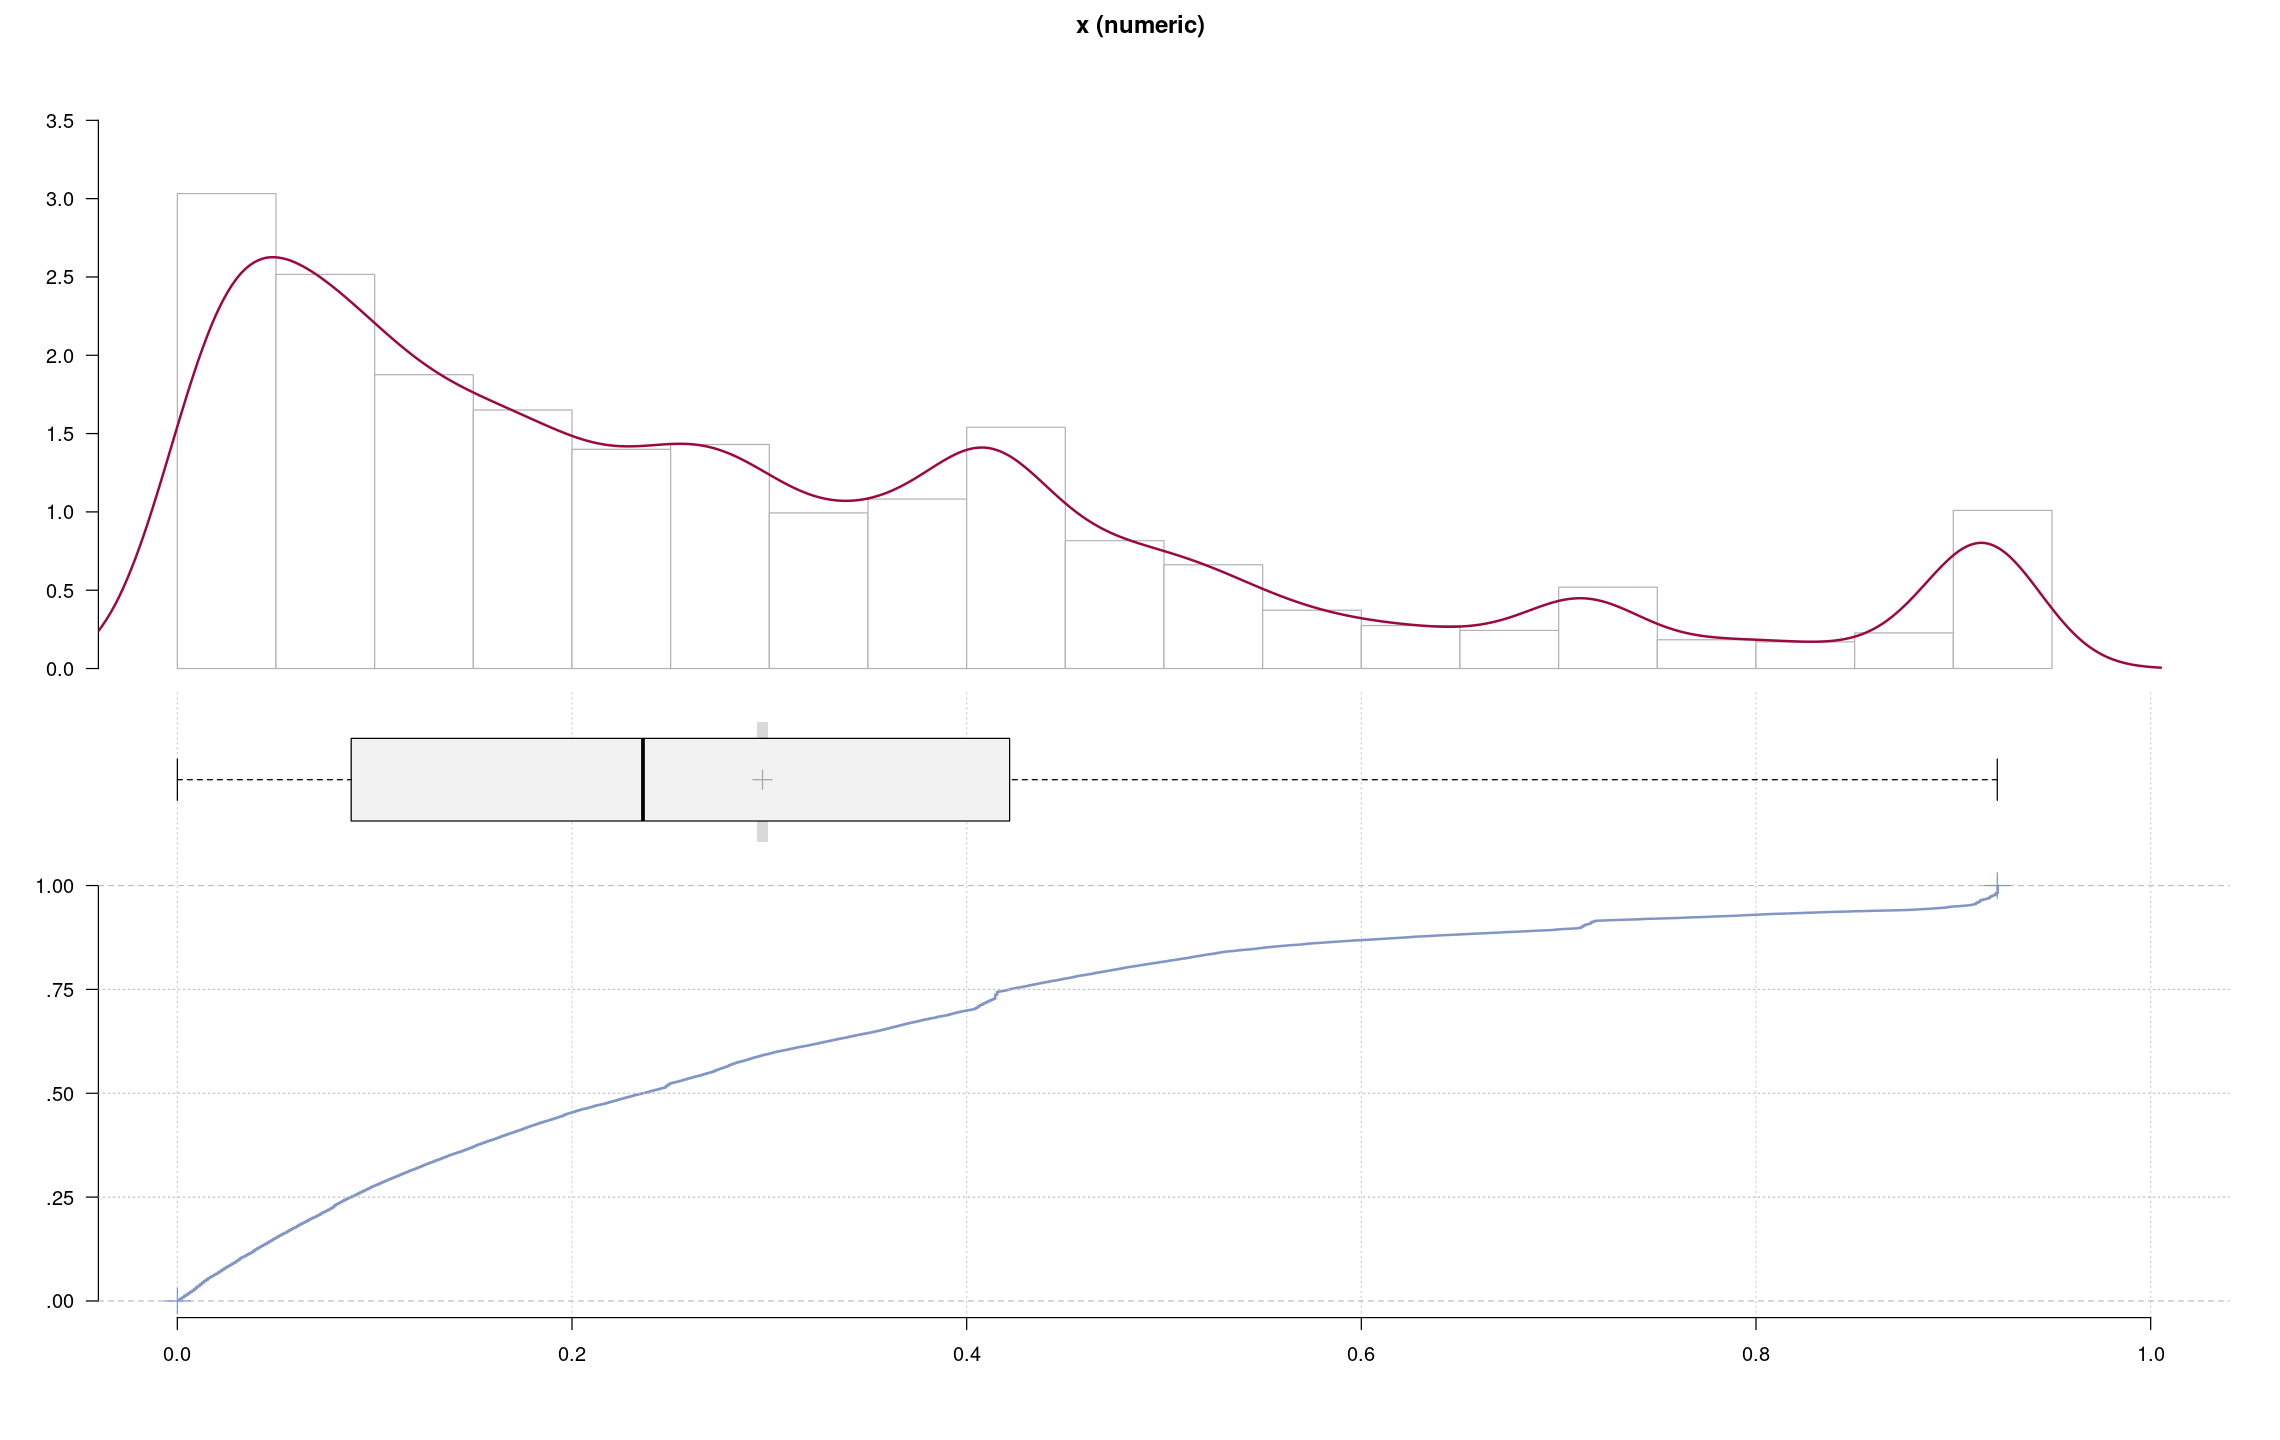

In [67]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [17]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [70]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 302


In [71]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 701


In [72]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 0.1243156195


In [73]:
print(median(x))

[1] 0.2359707356


In [74]:
print(calculate_mode(x))

[1] 0.04913677851


In [76]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = NULL, m = 50)

print(candidate_block_sizes)

  [1] 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 [19] 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 [37] 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 [55] 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 [73] 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 [91] 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409
[109] 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427
[127] 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445
[145] 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
[163] 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481
[181] 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499
[199] 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
[217] 518 519 520 521 522 523 524 525 526 527 528 529 530 531 53

In [77]:
               n              NAs           unique'
           gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning mes

In [78]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [79]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

           loc_star   scale_star    shape_star
486  0.217527558571 0.4477052314 -0.5795744913
489  0.172932784605 0.4181567851 -0.4814717284
511  0.218135561014 0.3937560252 -0.4797638253
520  0.089384252520 0.4599474808 -0.4774304651
553 -0.458504117405 1.9516573842 -1.4134475721
583  0.168981582211 0.7660696164 -1.0169618936
614 -0.163014246416 1.4348083188 -1.3220528380
649 -0.008379853071 1.1414778082 -1.2265332438
660 -0.559892469882 2.1257999008 -1.4342518461


In [81]:
print(gev_mixture_model_object$weights)

           486            489            511            520            553 
0.036446296647 0.113316916083 0.597499526425 0.102633074446 0.013411630991 
           583            614            649            660 
0.066868725137 0.026444402349 0.009585148702 0.033794279220 


In [82]:
print(which.max(gev_mixture_model_object$weights))

511 
  3 


In [84]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 4


In [85]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 4


In [86]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 9


In [87]:
print(gev_mixture_model_object$information_criteria)

         AIC          BIC 
-137.8247923  158.4667263 


In [88]:
print(gev_mixture_model_object$threshold)

[1] 0.08677285165


## Diagnostic

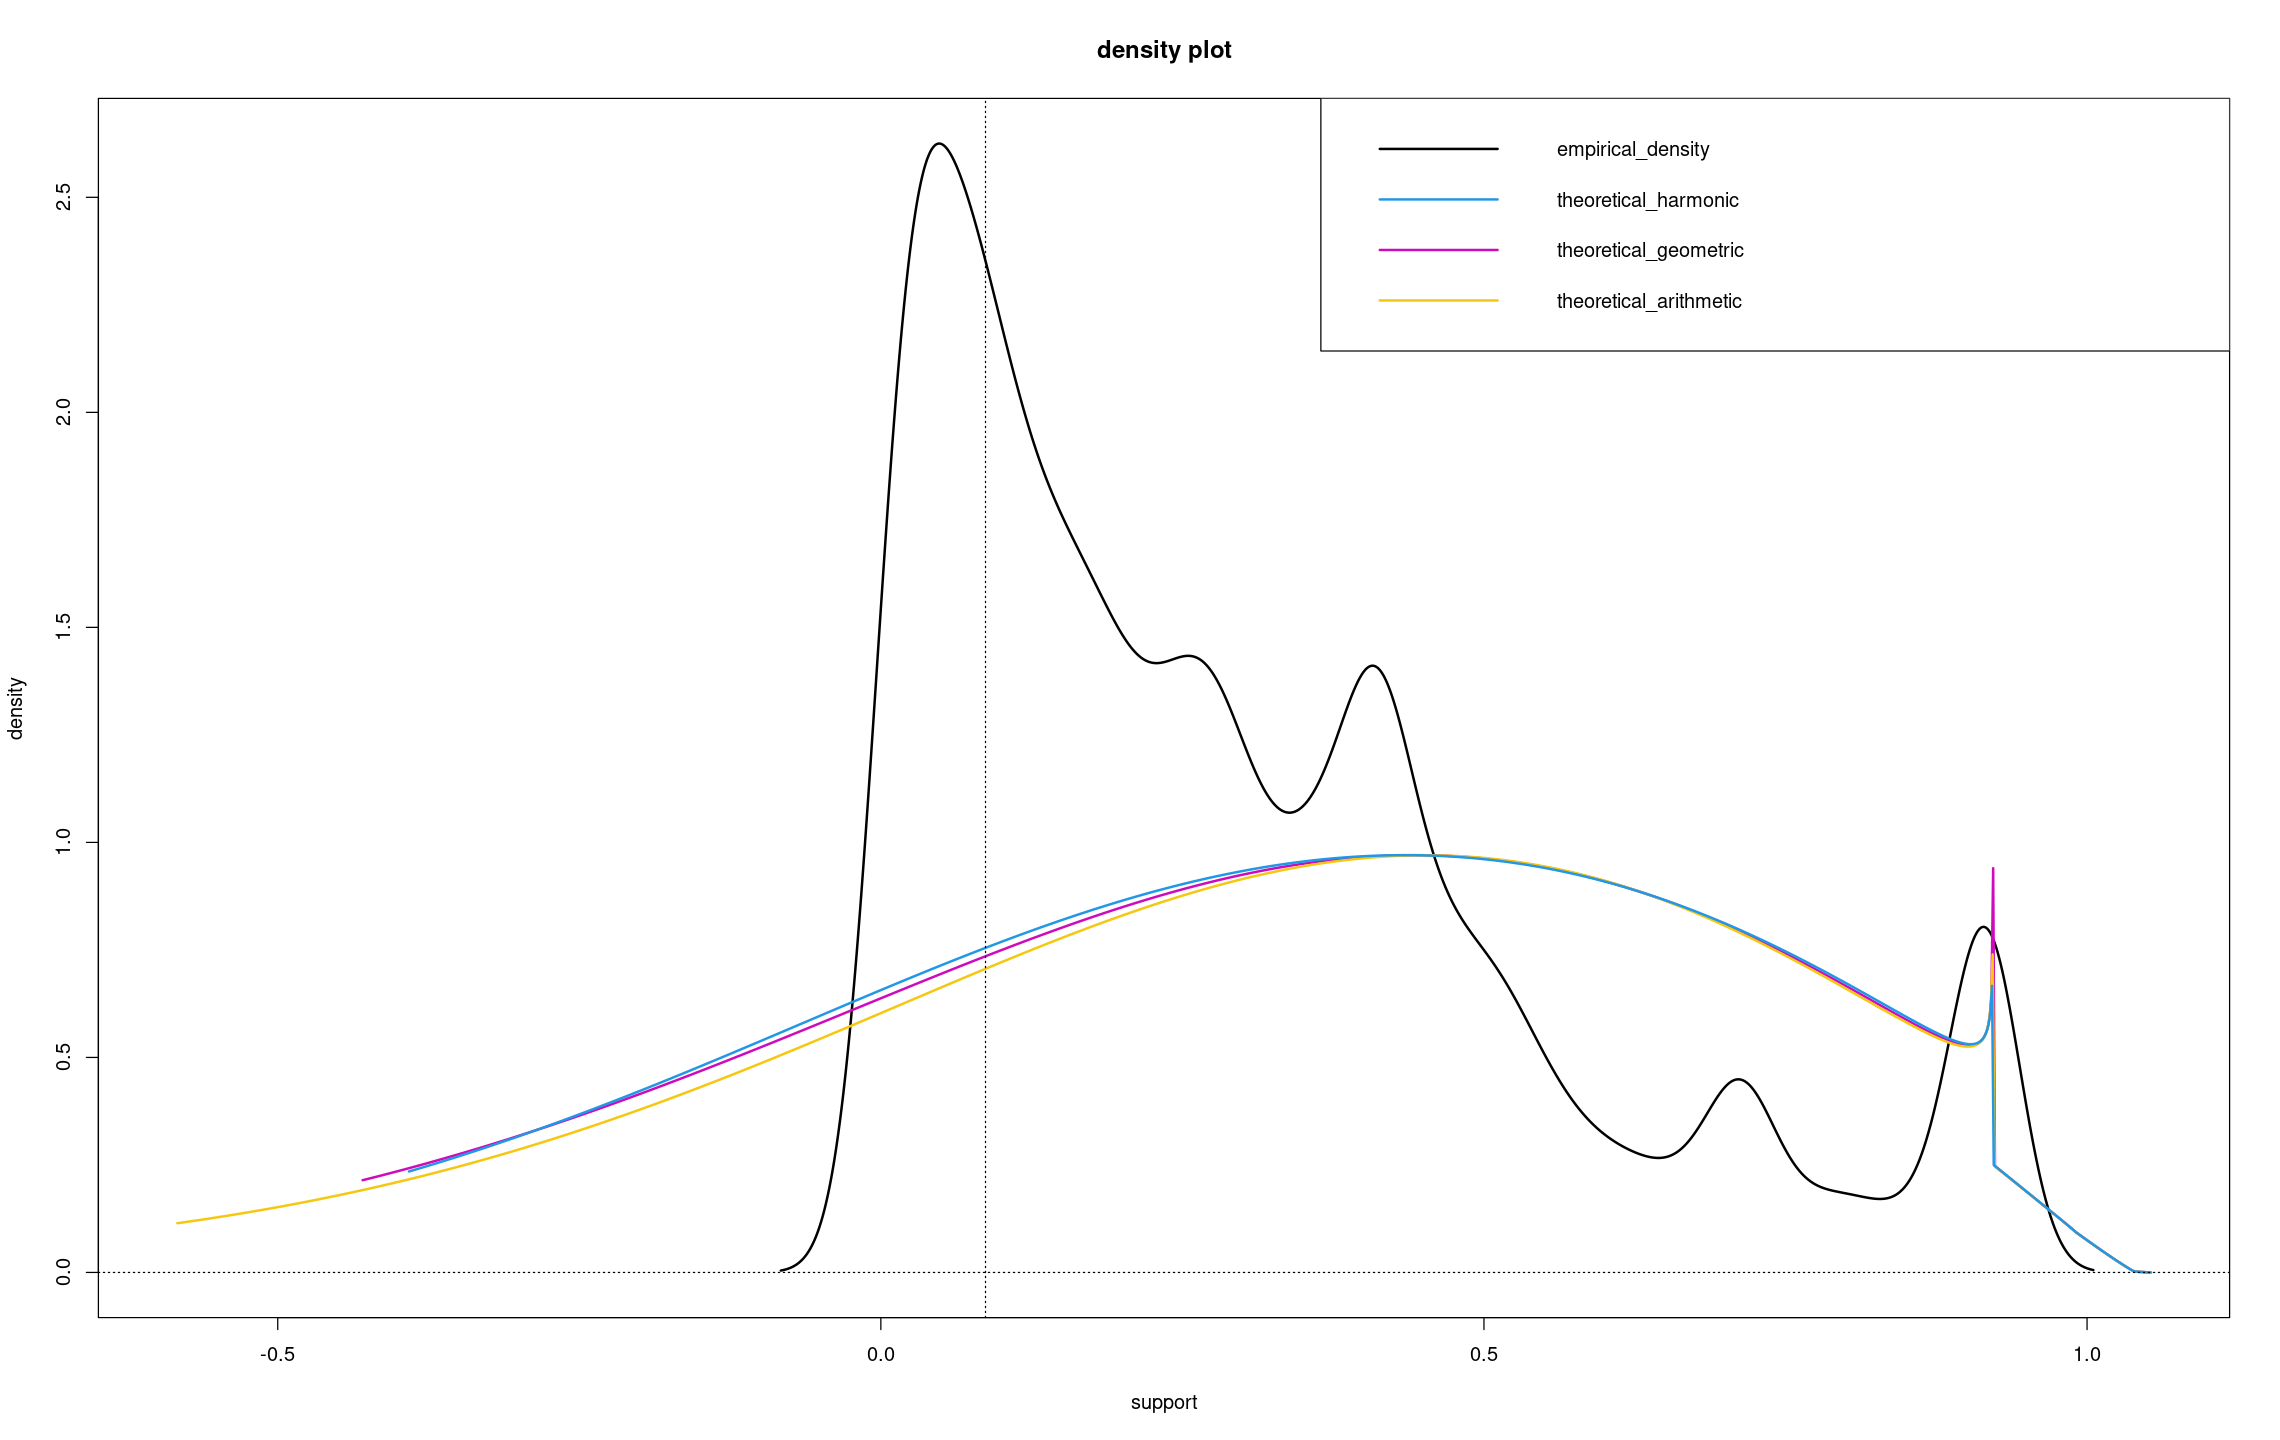

In [89]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

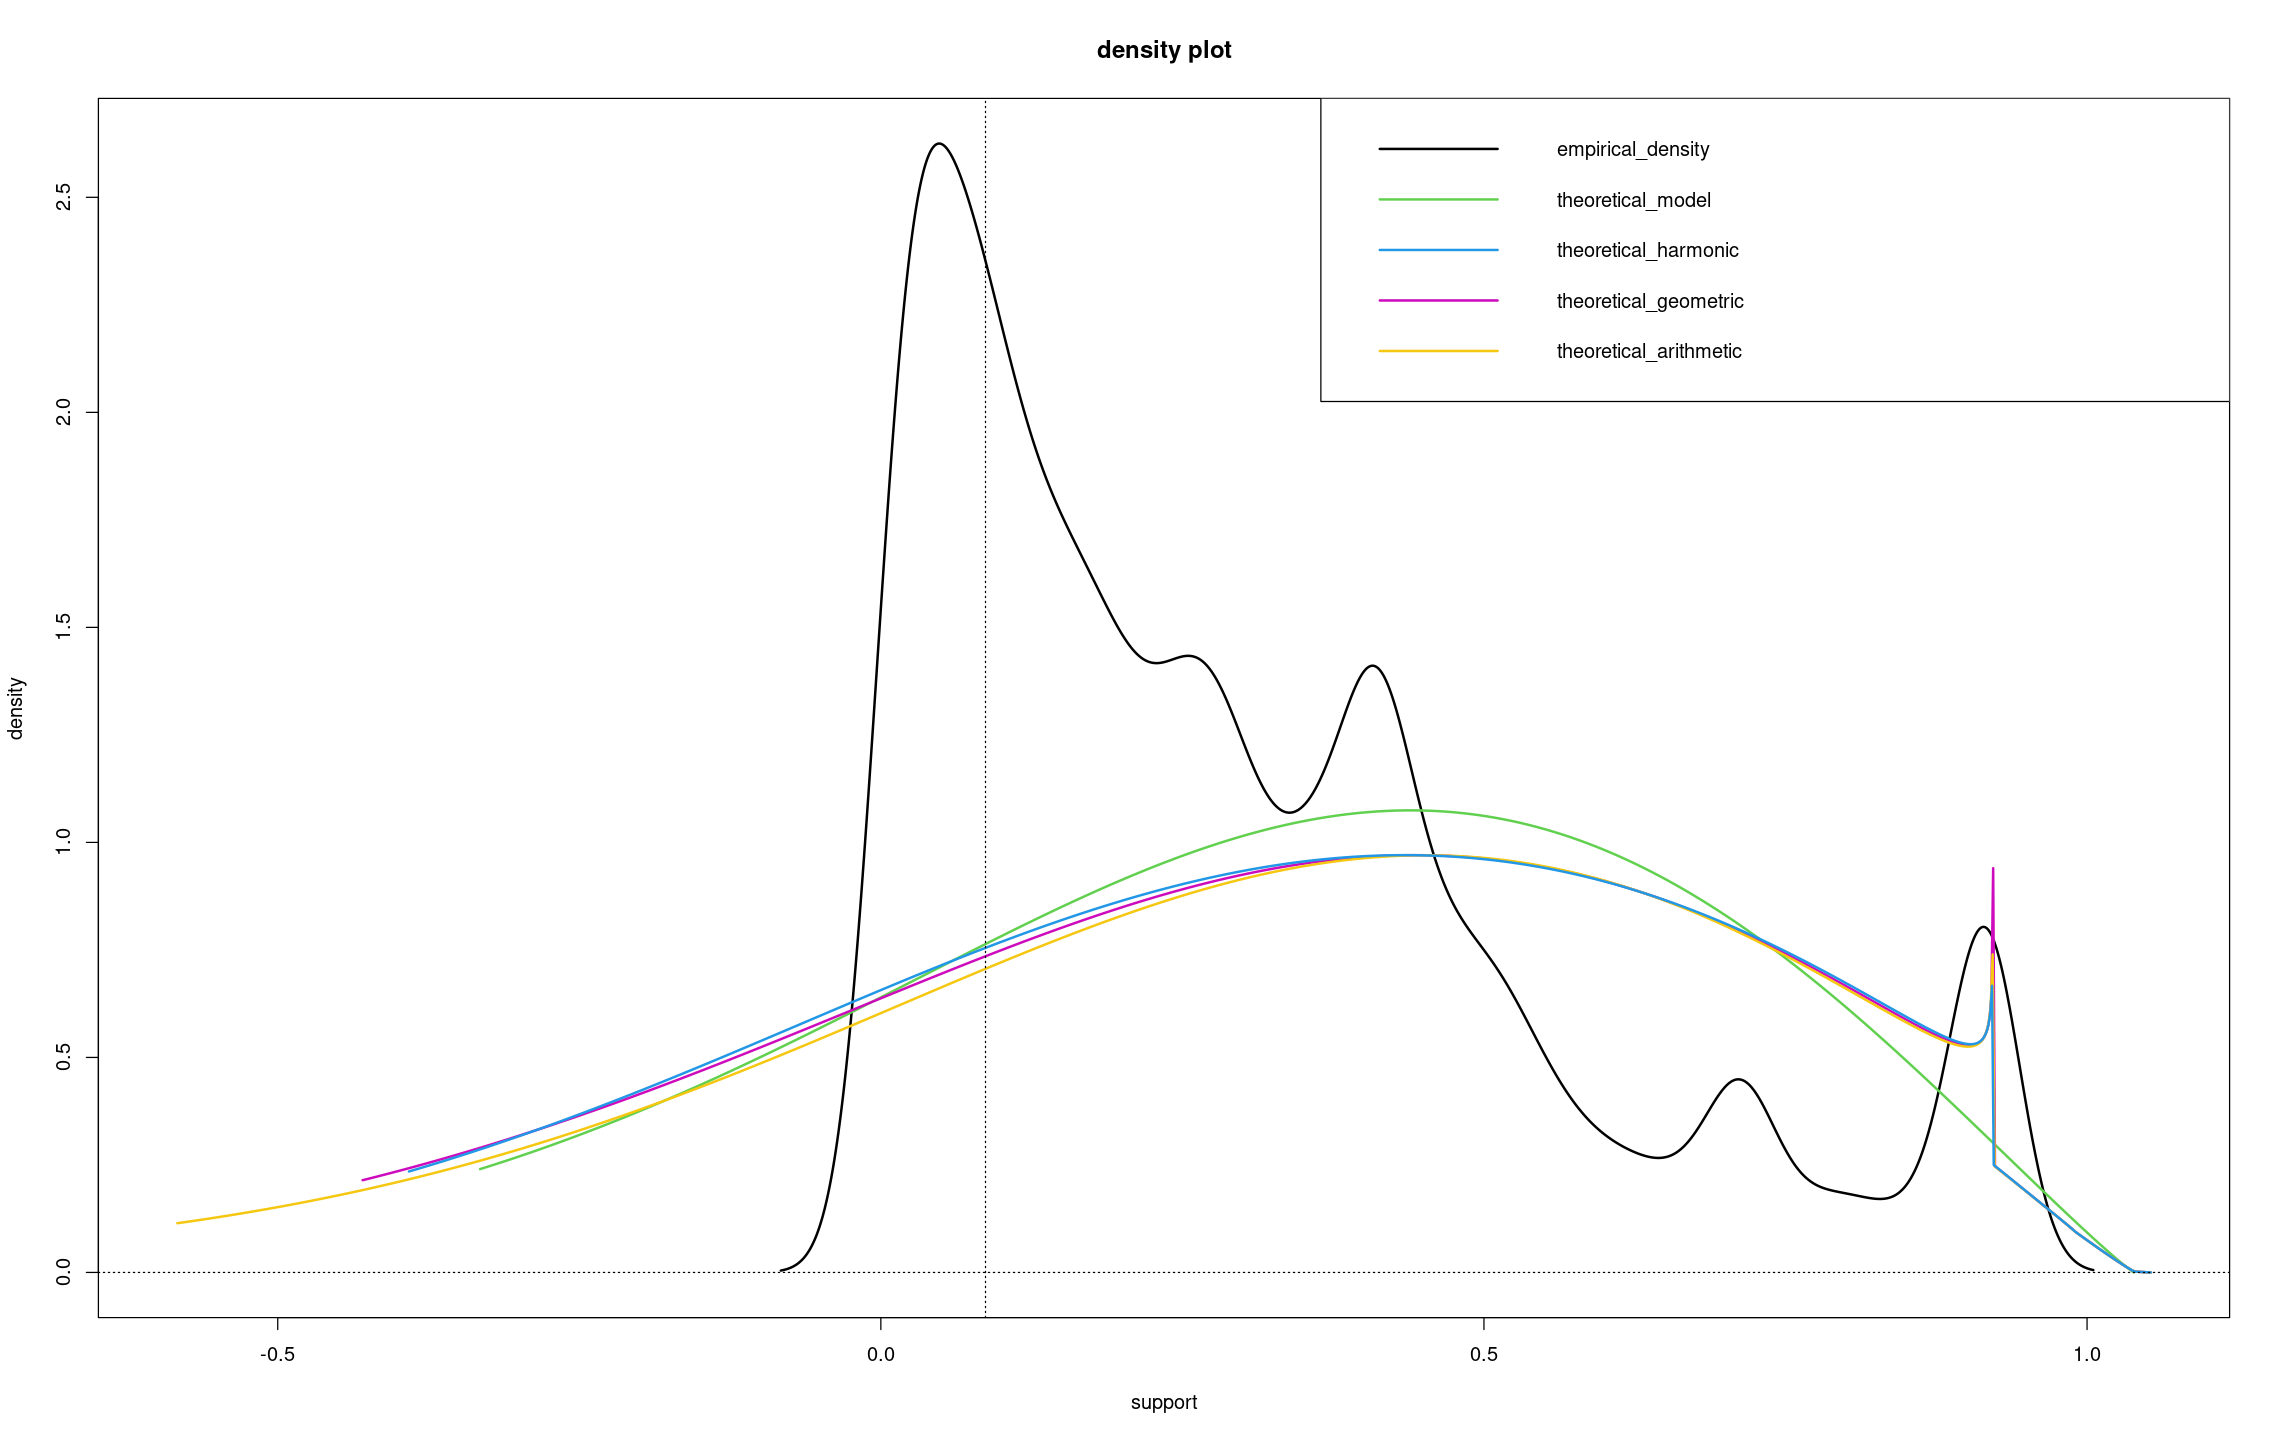

In [90]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

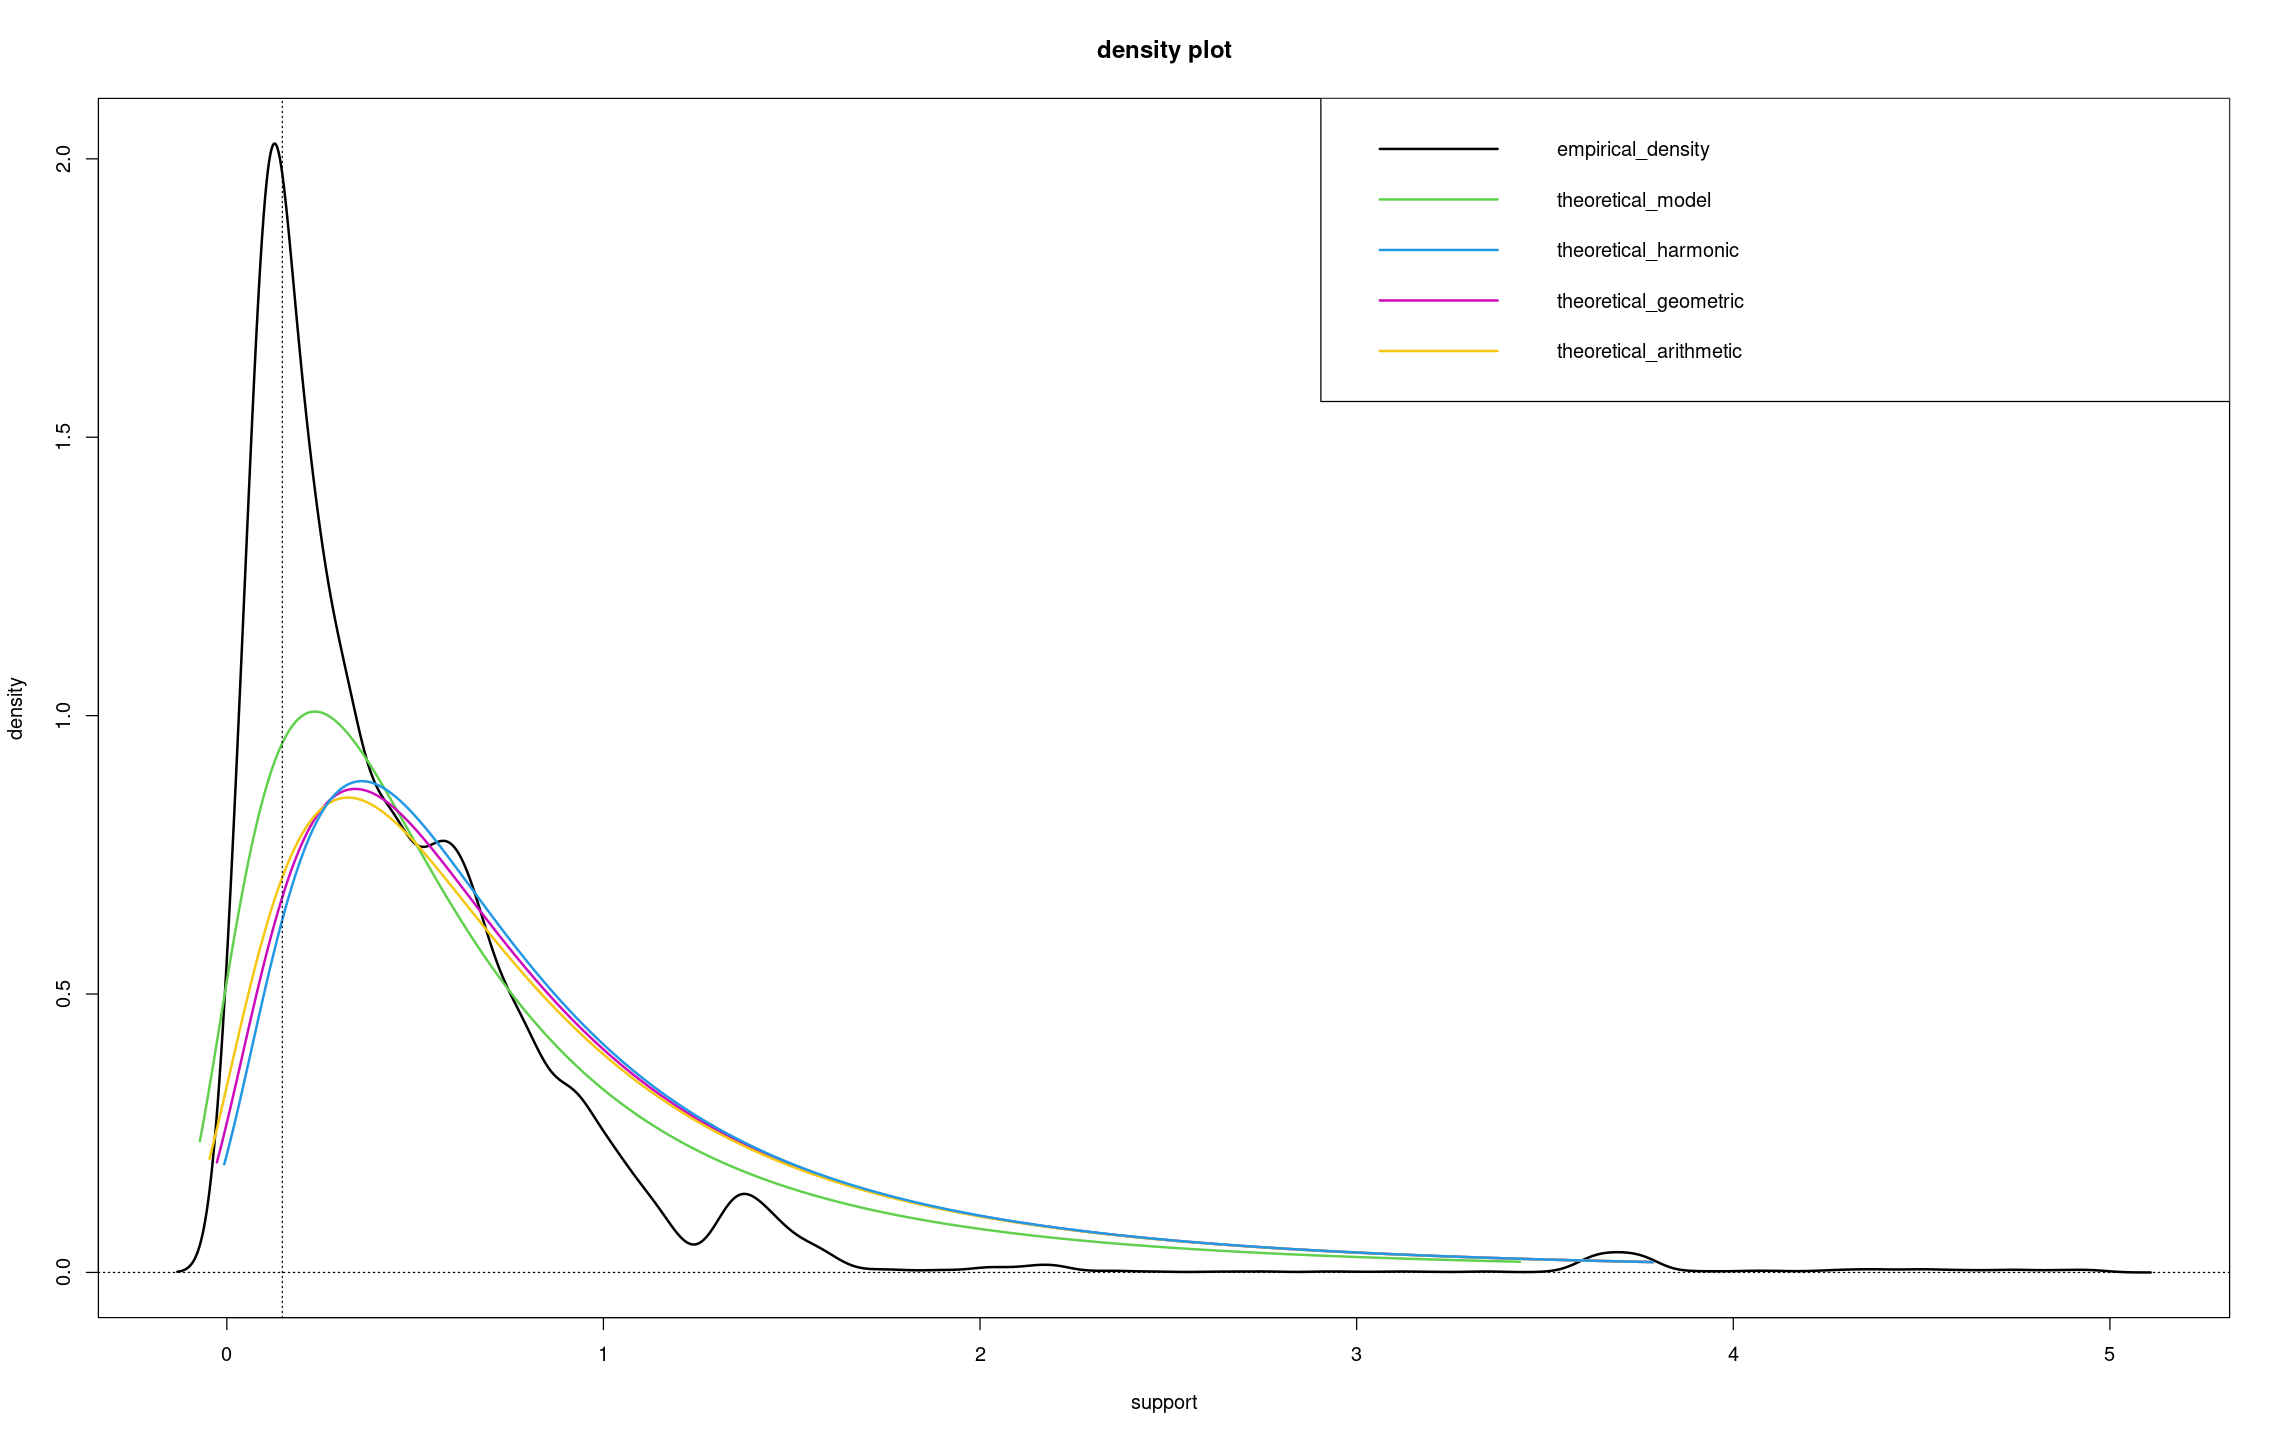

In [56]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

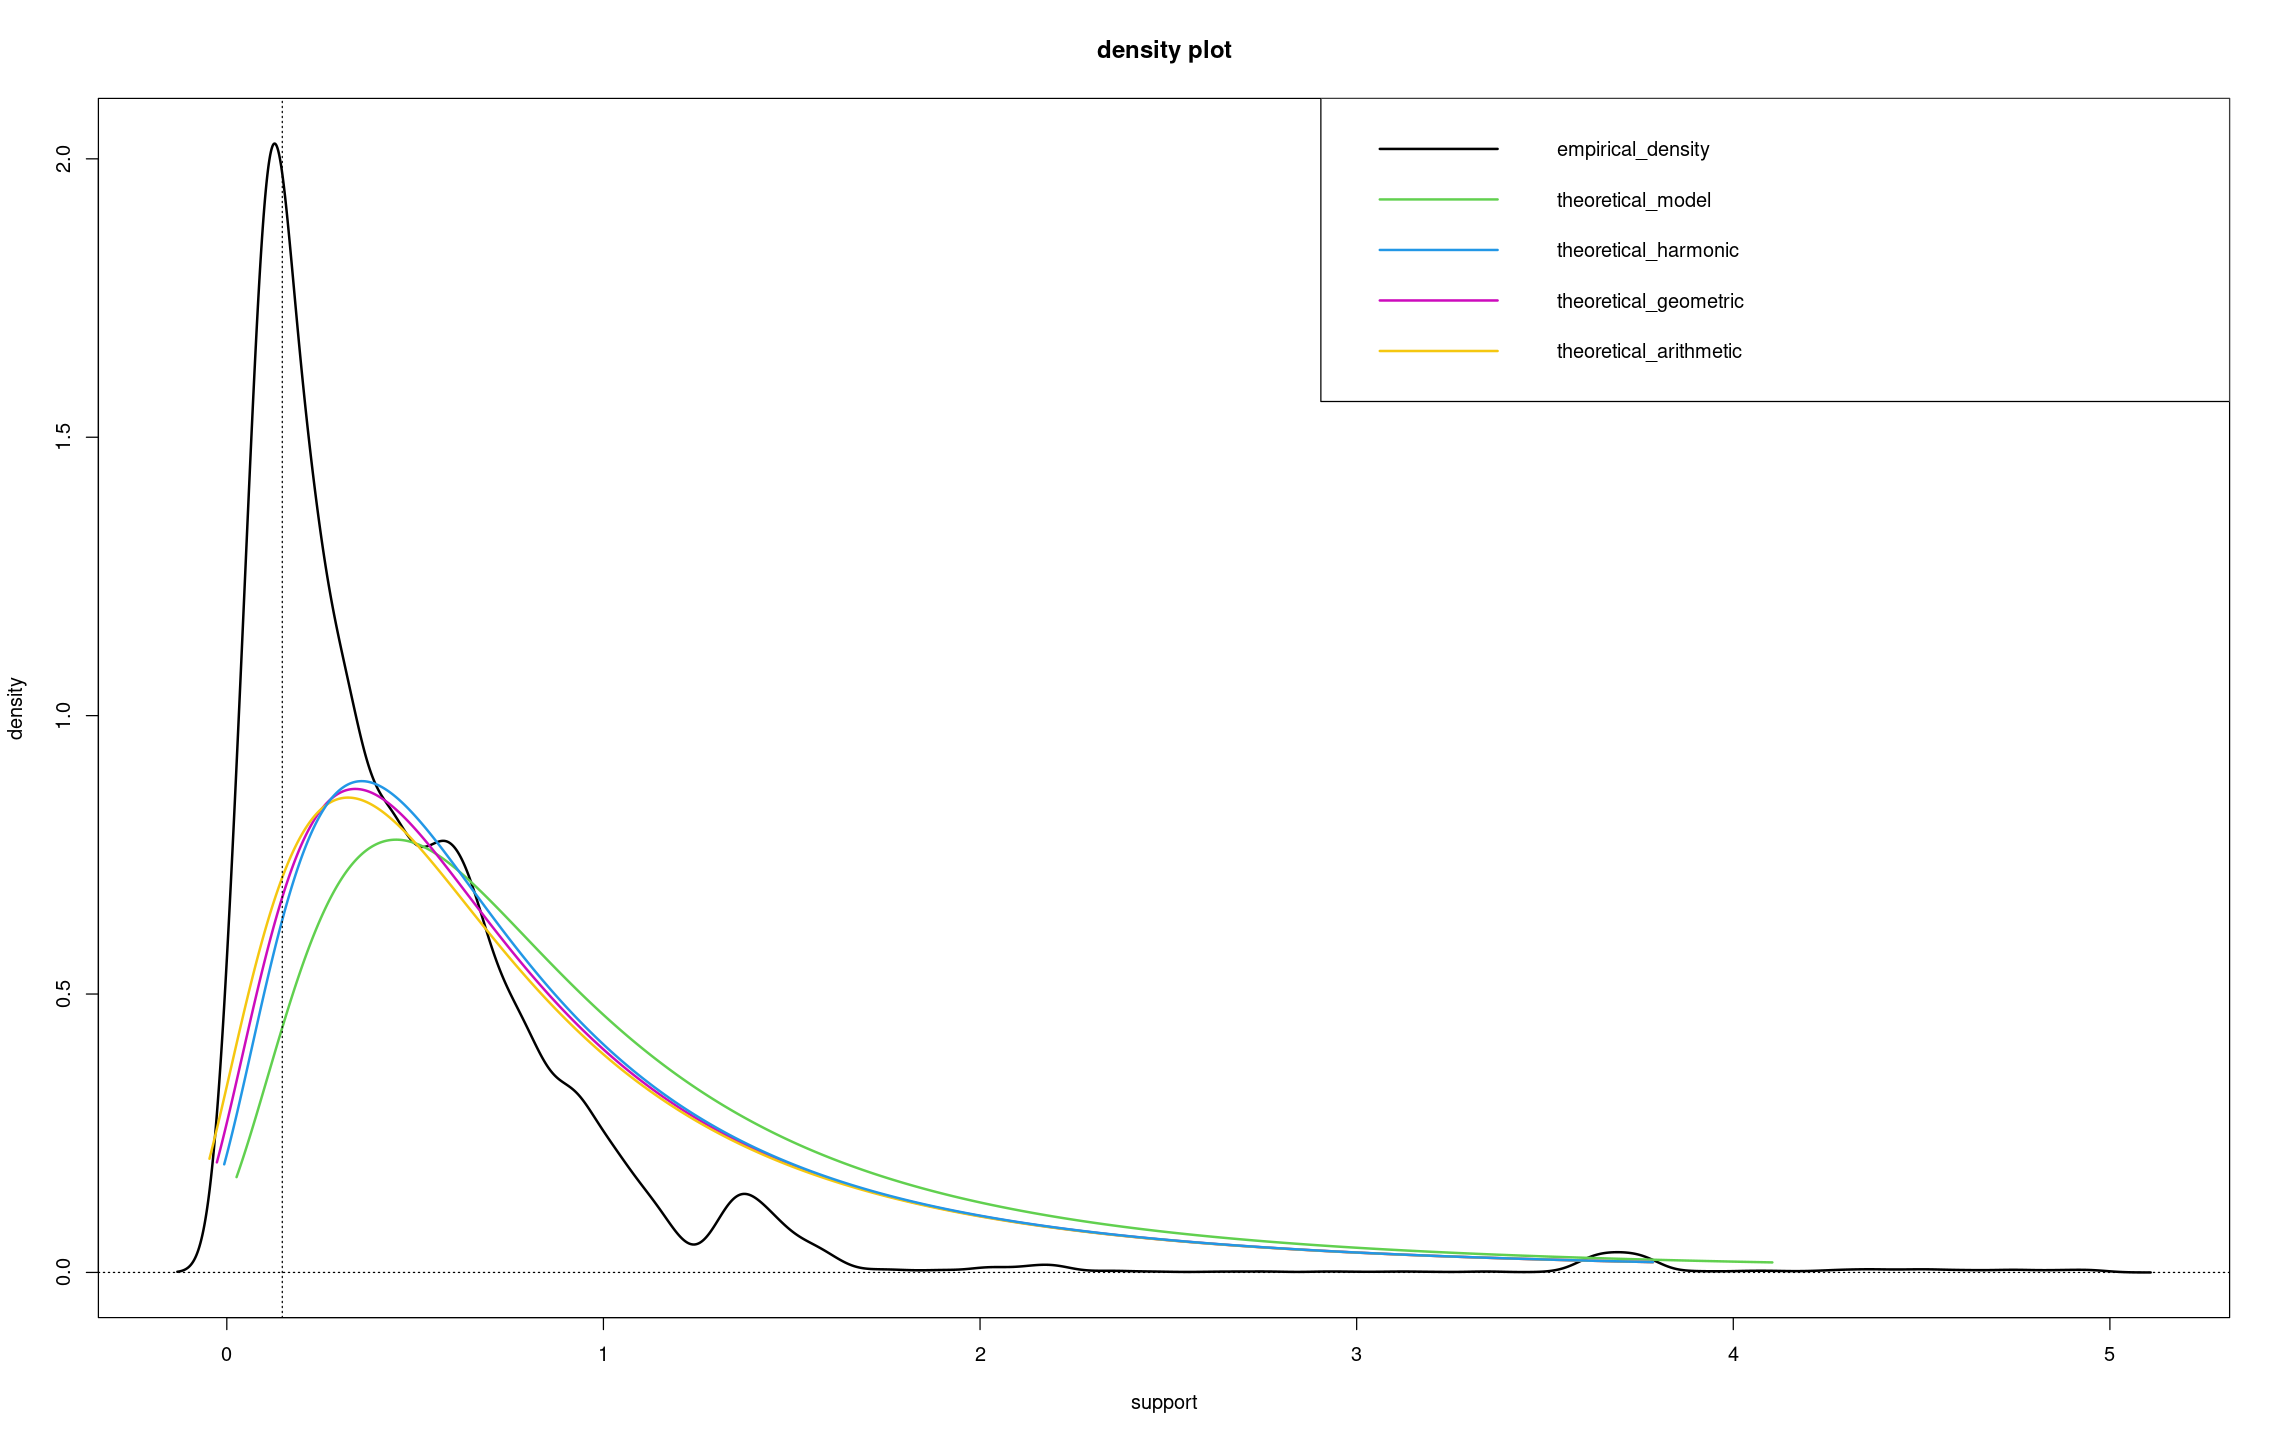

In [57]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [58]:
alpha <- n^(-2)

print(alpha)

[1] 1.915930076e-09


In [59]:
true_quantile <- NULL

print(true_quantile)

NULL


In [60]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

$quantiles_object
     lower_bound    estimate upper_bound
541 -33789.02250 6343.342791 46475.70808
542 -17138.32866 3767.322799 24672.97426
543 -13815.93975 3167.414738 20150.76922

$gev_mixture_model_quantile
[1] 5128.503313

$smalest_lower_ci_bound
[1] -33789.0225

$largest_upper_ci_bound
[1] 46475.70808

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -20381.04283 8495.191664 37371.42616

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -5303.527652 2385.192892 10073.91344

In [61]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
     lower_bound    estimate upper_bound
541 -33789.02250 6343.342791 46475.70808
542 -17138.32866 3767.322799 24672.97426
543 -13815.93975 3167.414738 20150.76922

$gev_mixture_model_quantile
[1] 5128.503313

$smalest_lower_ci_bound
[1] -33789.0225

$largest_upper_ci_bound
[1] 46475.70808

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -20381.04283 8495.191664 37371.42616

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -5303.527652 2385.192892 10073.91344

In [62]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
     lower_bound    estimate upper_bound
541 -33789.02250 6343.342791 46475.70808
542 -17138.32866 3767.322799 24672.97426
543 -13815.93975 3167.414738 20150.76922

$gev_mixture_model_quantile
[1] 5128.503475

$smalest_lower_ci_bound
[1] -33789.0225

$largest_upper_ci_bound
[1] 46475.70808

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -20381.04283 8495.191664 37371.42616

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -5303.527652 2385.192892 10073.91344

In [63]:
options(repr.plot.width=23, repr.plot.height=6)

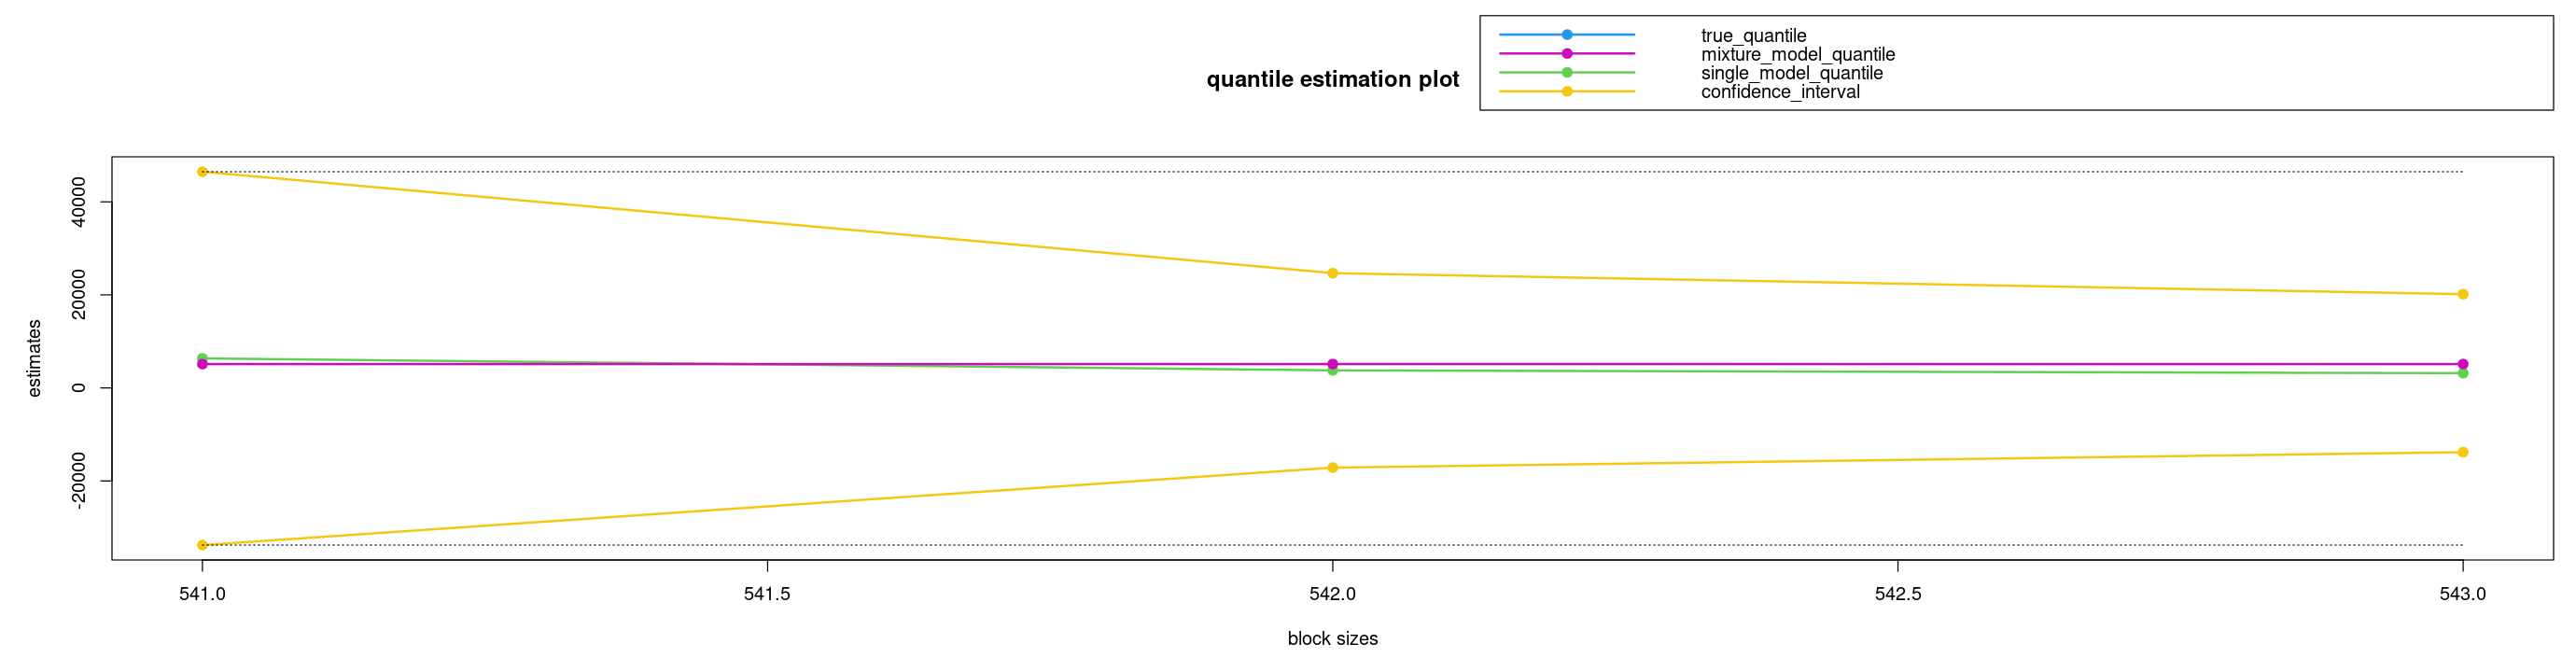

In [64]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")